<a href="https://colab.research.google.com/github/Aayush050502/Top-5-Home-Printers-Ranked/blob/main/top_5_printers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
printers_df = pd.read_csv('/content/home_printers_comparison.csv')

In [ ]:
# Step 2: Displaying of the Criteria and the Scores assigned
criteria = {
    "Faster Scan": [9, 6, 7, 8, 8],
    "Cost per Print": [6, 5, 8, 9, 7],
    "Colour Quality": [8, 7, 9, 7, 6],
    "Speed": [7, 8, 7, 6, 9]
}


In [ ]:
# Converting criteria to DataFrame
criteria_df = pd.DataFrame(criteria)

In [ ]:
# Normalizing the scores
scaler = MinMaxScaler()
criteria_scaled = scaler.fit_transform(criteria_df)


In [ ]:
# Converting to Data frame
criteria_scaled_df = pd.DataFrame(criteria_scaled, columns=criteria_df.columns)


In [ ]:
# Equal Weights to be given to all criteria
weights = {
    "Faster Scan": 0.25,
    "Cost per Print": 0.25,
    "Colour Quality": 0.25,
    "Speed": 0.25
}


In [ ]:
# Calculation of weighted score
criteria_scaled_df['Weighted Score'] = np.dot(criteria_scaled_df, list(weights.values()))


In [ ]:
# Added the weighted score to the original DataFrame
printers_df['Weighted Score'] = criteria_scaled_df['Weighted Score']

In [ ]:
# Printers being ranked on weighted score
printers_df['Rank'] = printers_df['Weighted Score'].rank(ascending=False)

<ipython-input-12-82632656d22d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weighted Score', y='Printer Model', data=printers_df.sort_values('Rank', ascending=True), palette='viridis')


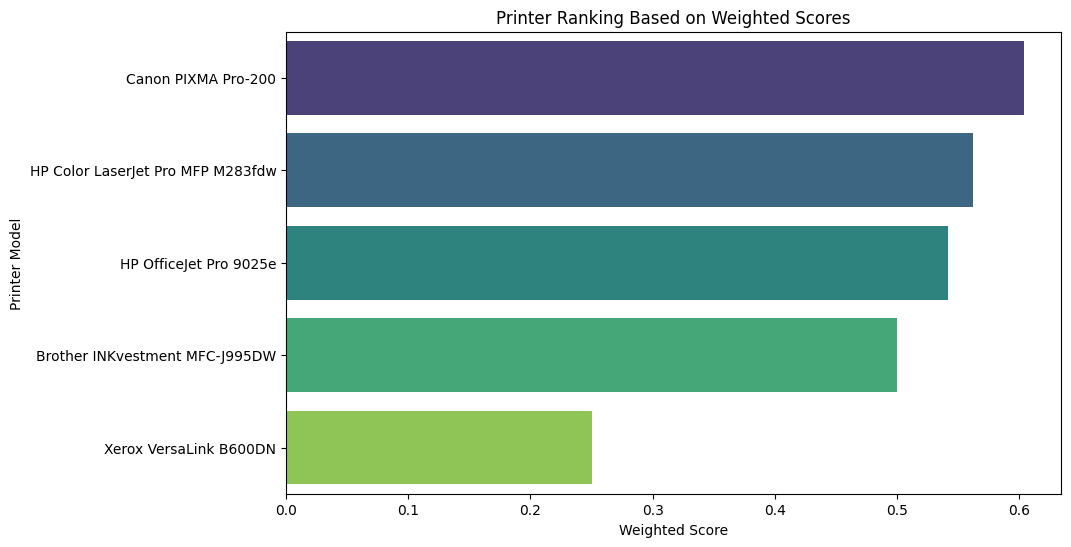

In [ ]:
# Step 3: Visualization Using Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Weighted Score', y='Printer Model', data=printers_df.sort_values('Rank', ascending=True), palette='viridis')
plt.title('Printer Ranking Based on Weighted Scores')
plt.xlabel('Weighted Score')
plt.ylabel('Printer Model')
plt.show()

<ipython-input-14-f42487bba5ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rank', y='Printer Model', data=printers_df.sort_values('Rank', ascending=True), palette='viridis')


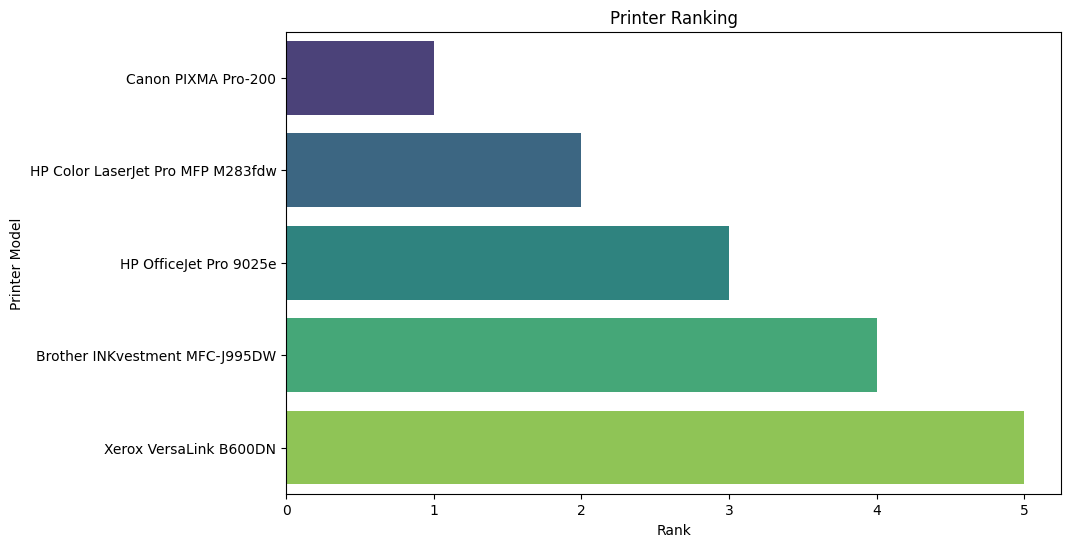

In [ ]:
# Bar plot for Rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Printer Model', data=printers_df.sort_values('Rank', ascending=True), palette='viridis')
plt.title('Printer Ranking')
plt.xlabel('Rank')
plt.ylabel('Printer Model')
plt.show()

In [ ]:
# Rank the DataFrame in ascending order by 'Weighted Score'
printers_df = printers_df.sort_values(by='Weighted Score', ascending=False)

In [ ]:
# Print the relevant columns
print(printers_df[['Printer Model', 'Weighted Score', 'Rank']])

                       Printer Model  Weighted Score  Rank
2                Canon PIXMA Pro-200        0.604167   1.0
0  HP Color LaserJet Pro MFP M283fdw        0.562500   2.0
4             HP OfficeJet Pro 9025e        0.541667   3.0
3     Brother INKvestment MFC-J995DW        0.500000   4.0
1             Xerox VersaLink B600DN        0.250000   5.0
